## Modeling

In this notebook, we're going to apply various machine learning approaches analyze the mouse retinal data

In [24]:
import sklearn as sk
import anndata as ad
import scanpy as sc 
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
adata = ad.read_h5ad('camr_scrublet_batch_filtered.h5ad')

## PCA

In [11]:
sc.tl.pca(adata)

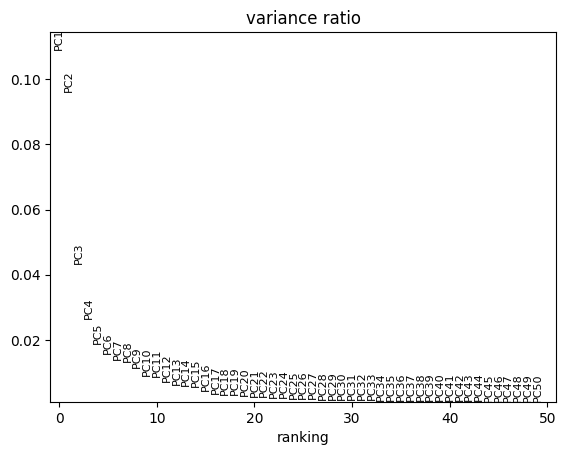

In [12]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=False)

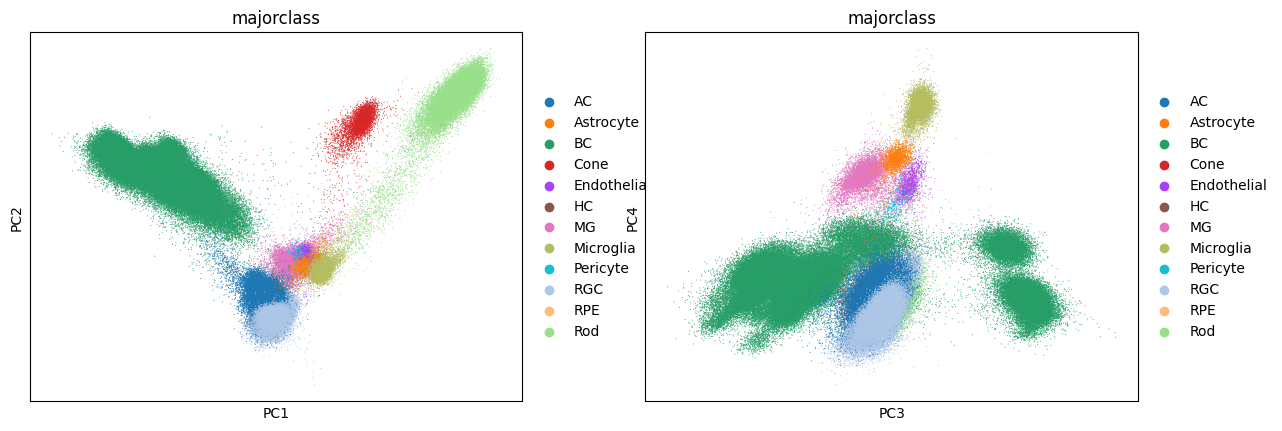

In [13]:
sc.pl.pca(
    adata,
    color=["majorclass"],
    dimensions=[(0, 1), (2, 3)],
    ncols=2,
    size=2,
)

In [14]:
sc.pp.neighbors(adata)

In [15]:
# Calculate UMAP Manually

# adata_umap = sc.tl.umap(adata, copy=True)

# sc.pl.umap(
#     adata_umap,
#     color=["majorclass"],
#     wspace=.2,
#     legend_loc="on data",
# )

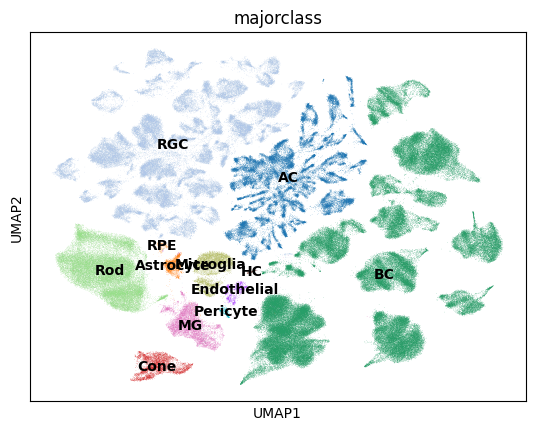

In [16]:
sc.pl.umap(
    adata,
    color=["majorclass"],
    wspace=.2,
    legend_loc="on data",
)

## Clustering

In [18]:
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

In [19]:
print(adata)

AnnData object with n_obs × n_vars = 312186 × 1882
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'subclass_label', 'majorclass', 'author_cell_type', 'age', 'gender', 'reference', 'accession', 'sample_note', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', '

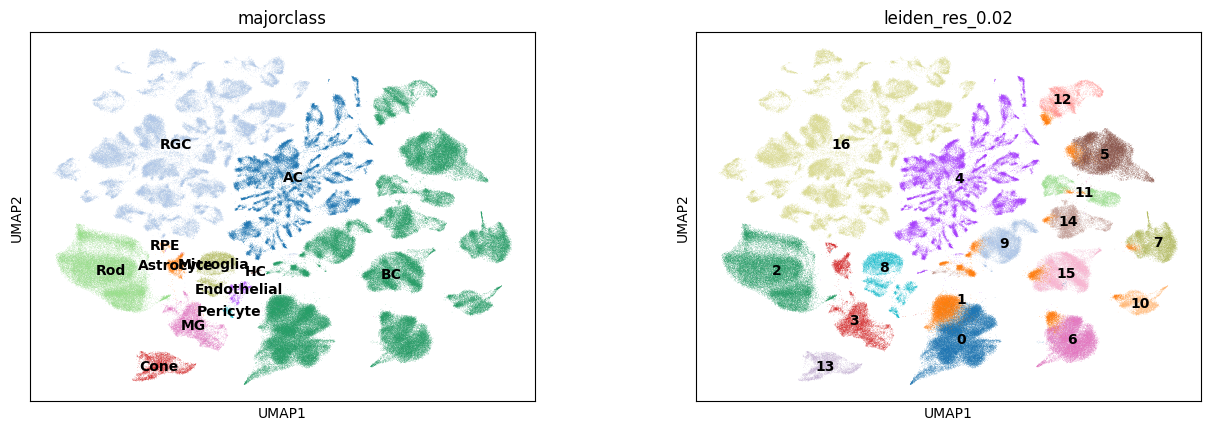

In [20]:
sc.pl.umap(
    adata,
    color=["majorclass", "leiden_res_0.02"],
    wspace=.2,
    legend_loc="on data",
    show=False
)

plt.savefig('figures/umap_majorclass_leiden_0.02.png')

In [21]:
adata.obs['majorclass'].value_counts()

majorclass
BC             147557
RGC             64853
AC              42824
Rod             34073
MG               7918
Microglia        6098
Cone             4842
Astrocyte        1925
Endothelial      1163
Pericyte          406
RPE               396
HC                131
Name: count, dtype: int64

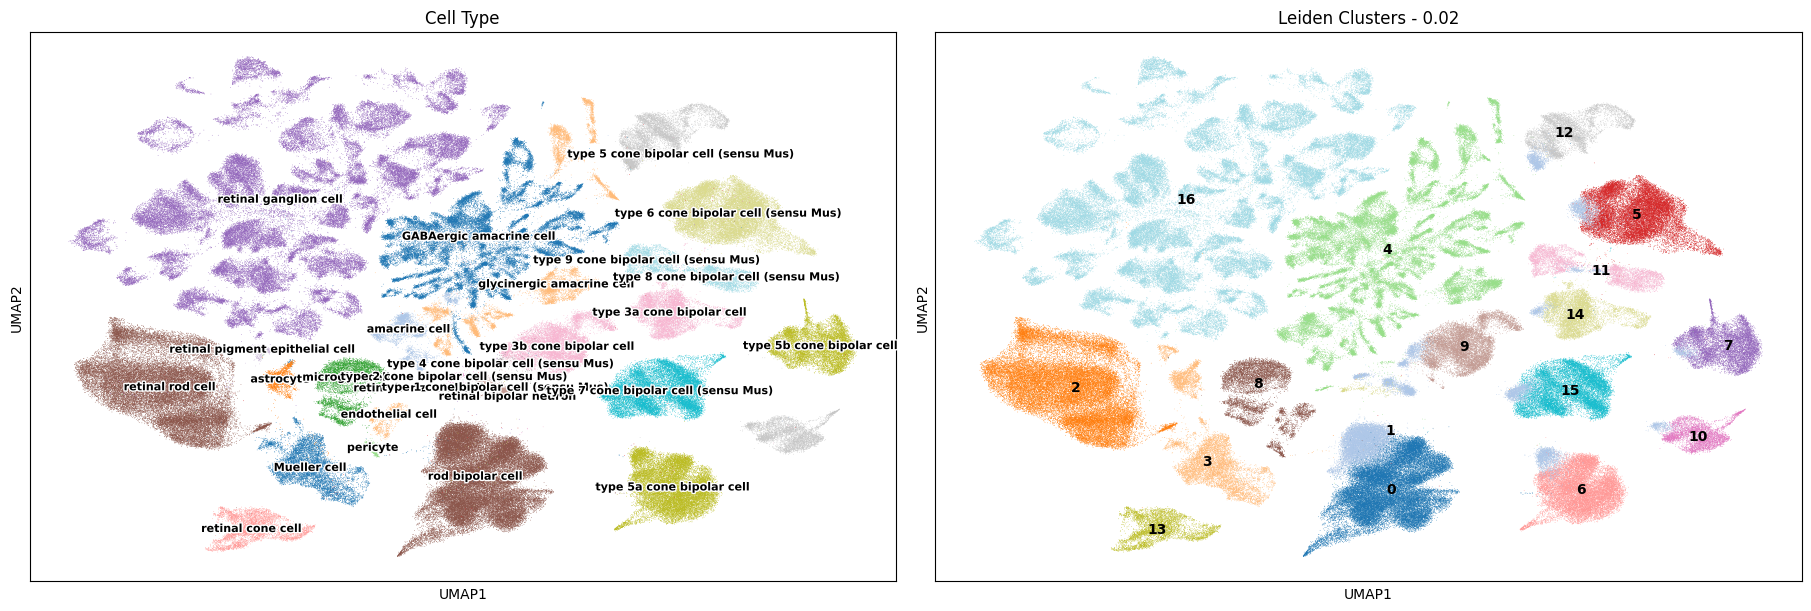

In [22]:
# Create UMAP plots horizontally with adjusted legends
fig, axs = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)

# Plot the first UMAP
sc.pl.umap(adata, color="cell_type", ax=axs[0], palette='tab20', legend_loc='on data', size=1, legend_fontsize=8, legend_fontoutline=2, title='Cell Type', show=False, wspace=.5)

# Plot the second UMAP
sc.pl.umap(adata, color="leiden_res_0.02", ax=axs[1], palette='tab20', legend_loc='on data', size=1, title='Leiden Clusters - 0.02', show=False, wspace=.5)

plt.show()

Based on gene expression data, bipolar cells exhibit greater heterogeneity within themselves compared to other major cell types. This is shown by the clustering, which separates bipolar cells into distinct subgroups while not segregating other major cell types as distinctly.

In [31]:
# Calculating Cluster Specific Differentially Expressed Genes
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.50", method="wilcoxon")

sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0.50", standard_scale="var", n_genes=5
)

In [ ]:
# Normalization Sanity Check
print("Raw Counts:")
print(adata.layers["raw"][:5, :5])



Raw Counts:
  (2, 2)	0.5734496116638184
  (3, 2)	0.6386954188346863
  (4, 2)	0.34429892897605896
  (4, 4)	0.34429892897605896


In [ ]:
# Print the first few rows and columns of the normalized data
print("Normalized Data:")
print(adata.X[:5, :5])

Normalized Data:
  (2, 2)	0.41708502173423767
  (3, 2)	0.4458776116371155
  (4, 2)	0.26107800006866455
  (4, 4)	0.26107800006866455


## Normalization Sanity Check

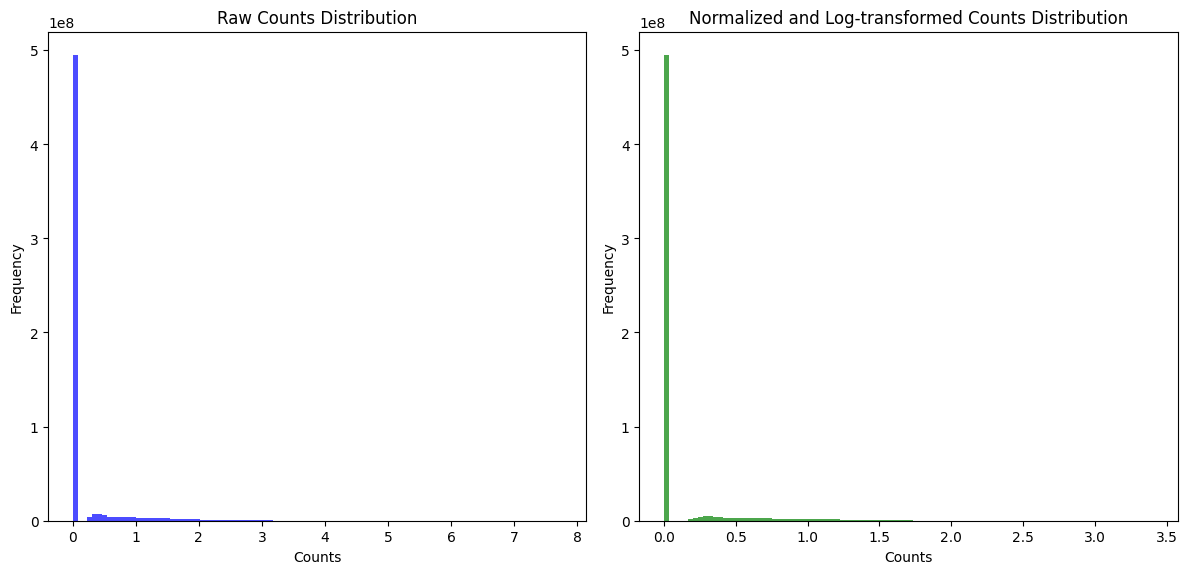

In [ ]:
import matplotlib.pyplot as plt

# Convert to dense arrays and flatten
raw_counts = adata.layers["raw"].toarray().flatten()
normalized_counts = adata.X.toarray().flatten()

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(raw_counts, bins=100, color='blue', alpha=0.7)
plt.title('Raw Counts Distribution')
plt.xlabel('Counts')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(normalized_counts, bins=100, color='green', alpha=0.7)
plt.title('Normalized and Log-transformed Counts Distribution')
plt.xlabel('Counts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Summary statistics for raw counts
print("Raw Counts Summary Statistics:")
print(f"Min: {np.min(raw_counts)}, Max: {np.max(raw_counts)}, Mean: {np.mean(raw_counts)}, Std: {np.std(raw_counts)}")

# Summary statistics for normalized and log-transformed counts
print("Normalized and Log-transformed Counts Summary Statistics:")
print(f"Min: {np.min(normalized_counts)}, Max: {np.max(normalized_counts)}, Mean: {np.mean(normalized_counts)}, Std: {np.std(normalized_counts)}")


Raw Counts Summary Statistics:
Min: 0.0, Max: 7.755390644073486, Mean: 0.18239399790763855, Std: 0.5289703011512756
Normalized and Log-transformed Counts Summary Statistics:
Min: 0.0, Max: 3.404916524887085, Mean: 0.11371065676212311, Std: 0.30618733167648315


## Quality of Life

In [ ]:
# # Save the entire session
# filename = 'notebook_state.pkl'
# with open(filename, 'wb') as f:
#     dill.dump_session(f)

In [ ]:
# import dill

# # Load the saved session
# filename = 'notebook_state.pkl'
# with open(filename, 'rb') as f:
#     dill.load_session(f)